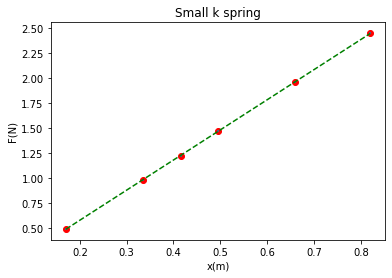

Slope = 3.02 N/m
Error in slope = 0.02 N/m
Goodness of fit = 0.71


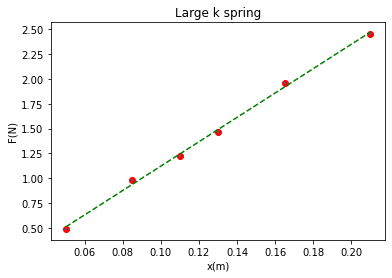

Slope = 12.25 N/m
Error in slope = 0.08 N/m
Goodness of fit = 52.08


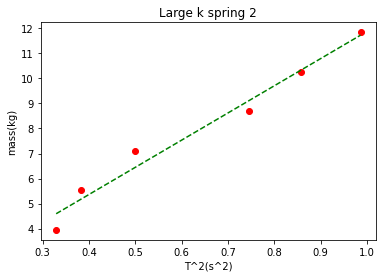

Slope = 10.86 N/m
Error in slope = 0.00 N/m
Goodness of fit = 1180206.46


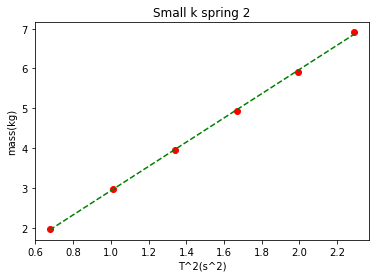

Slope = 3.05 N/m
Error in slope = 0.00 N/m
Goodness of fit = 5566.13
The error of T^2 in large k in method 2 is 0.0357076923076923
The error of T^2 in small k in method 2 is 0.05463333333333333
The error of large k in method 2 is  -1.2249668246445498
The error of small k in method 2 is  -0.22353020134228185


In [5]:
#Physics plotting and least-squares fitting library
#to be imported 
#22Nov2020
#Hanna 

import numpy as np
import matplotlib.pyplot as plt
import math

#define plotting and linear least squares fitting as functions

#goodness of fit parameter
def LLSFD2(x,y,dy,b,m):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D


def plotfit(x,y,dy,title,xlabel,ylabel,slopeunit):
    b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)
    fit = b+m*x
    N = LLSFD2(x,y,dy,b,m)    
    D=Delta(x, dy)
    dm = math.sqrt(1/D*sum(1/dy**2)) #error in slope
    db = math.sqrt(1/D*sum(x**2/dy**2)) #error in intercept
    plt.scatter(x, y, color='red', marker='o')
    #Plot least squares fit line
    plt.plot(x, fit, color='green', linestyle='--')

    #Plot y error bars - do not need to modify
    plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none")

    #Write x and y axes labels, title.  Modify these!
    plt.xlabel(xlabel) #x-axis label
    plt.ylabel(ylabel) #y-axis label
    plt.title(title) #plot title
    plt.show()
    
    print (f"Slope = {m:.2f} {slopeunit}")
    print (f"Error in slope = {dm:.2f} {slopeunit}")
    print (f"Goodness of fit = {N:.2f}")


m1 = np.array([50,100,125,150,200,250])/1000
x1 = np.array([17,33.5,41.5,49.5,66,82])/100
errorm1 = np.array([1,1,1,1,1,1])/1000

method1pt1 = plotfit(x1,m1*9.8,errorm1*9.8,'Small k spring','x(m)','F(N)','N/m')


m1 = np.array([50,100,125,150,200,250])/1000
x1 = np.array([5,8.5,11,13,16.5,21])/100
errorm1 = np.array([1,1,1,1,1,1])/1000

method1pt2 = plotfit(x1,m1*9.8,errorm1*9.8,'Large k spring','x(m)','F(N)','N/m')


m1 = np.array([100,140,180,220,260,300])/1000
T1 = np.array([.329,.383,.499,.745,.857,.986])
errorT1 = np.array([1,1,1,1,1,1])/1000

method2pt1 = plotfit(T1,m1*39.48,errorT1,'Large k spring 2','T^2(s^2)','mass(kg)','N/m')


m1 = np.array([50,75,100,125,150,175])/1000
T1 = np.array([.676,1.01,1.34,1.67,1.99,2.29])
errorT1 = np.array([1,1,1,1,1,1])/1000

method2pt2 = plotfit(T1,m1*39.48,errorT1,'Small k spring 2','T^2(s^2)','mass(kg)','N/m')

#error calculations for method 2

def Rule2(Q,m,dA,A):
  dQ = Q*m*(dA/A)
  return dQ

errorT2K = Rule2(.633,2,.022,.78)
print("The error of T^2 in large k in method 2 is", errorT2K)  

errorT2k = Rule2(1.49,2,.022,1.2)
print("The error of T^2 in small k in method 2 is", errorT2k)

errorK = Rule2(10.86,-2,.0357,.633)
print("The error of large k in method 2 is ", errorK)

errork= Rule2(3.05,-2,.0546,1.49)
print("The error of small k in method 2 is ", errork)